In [2]:
import cv2
import cv3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def rgbImg(img):
    if not isinstance(img, np.ndarray):
        raise TypeError('Input image type is not numpy.ndarray.')
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def grayImg(img):
    if not isinstance(img, np.ndarray):
        raise TypeError('Input image type is not numpy.ndarray.')
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def getImg(path):
    img = cv2.imread(path)
    if img is None:
        raise RuntimeError('Can not read img from the path.')
    return img

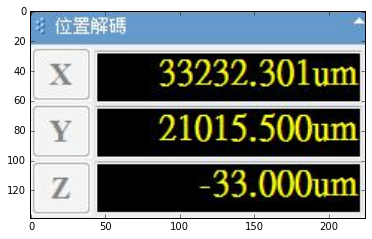

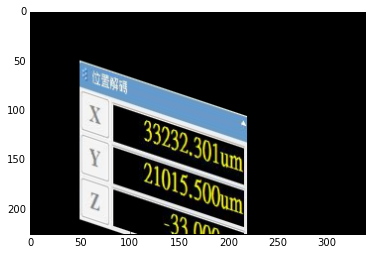

In [35]:
img = getImg('D:/AOI/OCR_segments/step2/test_data_03/0333-S1-維修-殘膠-座標.jpg'.decode('utf8').encode('big5'))
rows,cols = img.shape[:2]
pts1 = np.float32([[0,0],[200,0],[0,130]])
pts2 = np.float32([[50,50],[200,100],[50,200]])
M = cv2.getAffineTransform(pts1,pts2) #平移傾斜
res = cv2.warpAffine(img,M,(rows+200,cols))

plt.imshow(rgbImg(img))
plt.show()
plt.imshow(rgbImg(res))
plt.show()

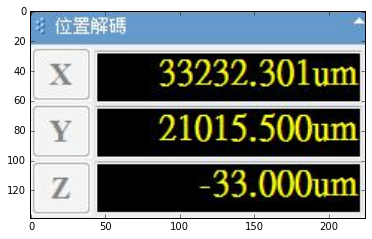

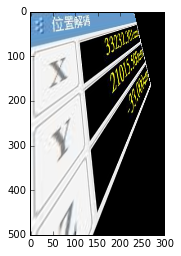

In [39]:
rows,cols = img.shape[:2]
pts1 = np.float32([[0,0],[150,0],[0,50],[100,100]])
pts2 = np.float32([[0,0],[200,0],[0,200],[200,200]])
M = cv2.getPerspectiveTransform(pts1,pts2) # 透視矩陣(重佈拉伸)需要4點
res = cv2.warpPerspective(img,M,(300,500))
plt.imshow(rgbImg(img))
plt.show()
plt.imshow(rgbImg(res))
plt.show()

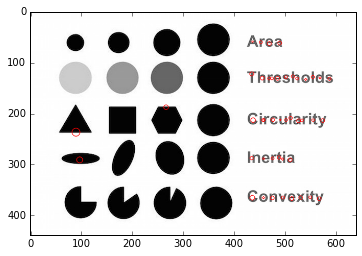

In [167]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# 只能分辨二值化圖形, blobColor只能給0或255
params.filterByColor = False
params.blobColor = 255
    
# Change thresholds 灰階深淺
params.minThreshold = 0;
params.maxThreshold = 127;
 
# Filter by Area. 面積
params.filterByArea = True
#params.minArea = 100
params.maxArea = 300
 
# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1
#params.maxCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 1.0
#params.maxConvexity = 0.99
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)
    
# Read image
im = cv2.imread("D:/AOI/BlobTest.jpg", cv2.IMREAD_GRAYSCALE)
 
# Set up the detector with default parameters.
#detector = cv2.SimpleBlobDetector()
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 撈第25個keypoint座標標上藍點
#cv2.circle(im_with_keypoints, 
#           tuple([int(round(ele)) for ele in keypoints[25].pt]), 
#           int(round(keypoints[25].size)), 
#           (255,0,0), 
#           -1) 

# Show keypoints
plt.imshow(rgbImg(im_with_keypoints))
plt.show()